In [1]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#Preprocessing
from sklearn.preprocessing import StandardScaler
import umap

# For reproducibility
from teachopencadd.utils import seed_everything
SEED = 42
seed_everything(SEED)

2024-08-23 15:34:40.429179: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
test_file_path = "../Data/Data/Initial Filtering/test_filter.csv"
train_file_path = "../Data/Data/Initial Filtering/train_filter.csv"

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

print("Full train dataset shape is {}".format(train_df.shape))
print("Full test dataset shape is {}".format(test_df.shape))

Full train dataset shape is (1460, 67)
Full test dataset shape is (1459, 66)


In [3]:
values = [ 298, 934, 706, 249, 335, 313, 691, 1169, 297, 224, 185, 635, 48, 809, 642, 605, 309, 166, 420, 747, 1350, 1190, 1340, 825, 1061, 581, 53, 1210, 1313, 1068, 1459, 523, 738, 583, 526, 542, 552, 568, 638, 670, 730, 1027]
train_df = train_df[train_df.Id.isin(values) == False]

In [4]:
# # configure the style of plots generated by Seaborn library
sns.set(style="white", context="notebook", rc = {'figure.figsize':(14,10)})

#redefine train_num
train_num = train_df.select_dtypes(include = ['float64', 'int64'])

# Construct UMAP object (instantiate UMAP class)
reducer = umap.UMAP(random_state=SEED, n_neighbors=10, min_dist=0.0, n_components=5)

#Convert each feature into z-scores (number of standard deviations from the mean, for comparbility)
scaled_data = StandardScaler().fit_transform(train_num.values)

In [5]:
#fit_transform method calls fit
#returns the transformed data as a numpy array
embedding = reducer.fit_transform(scaled_data)
embedding.shape

/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(1418, 5)

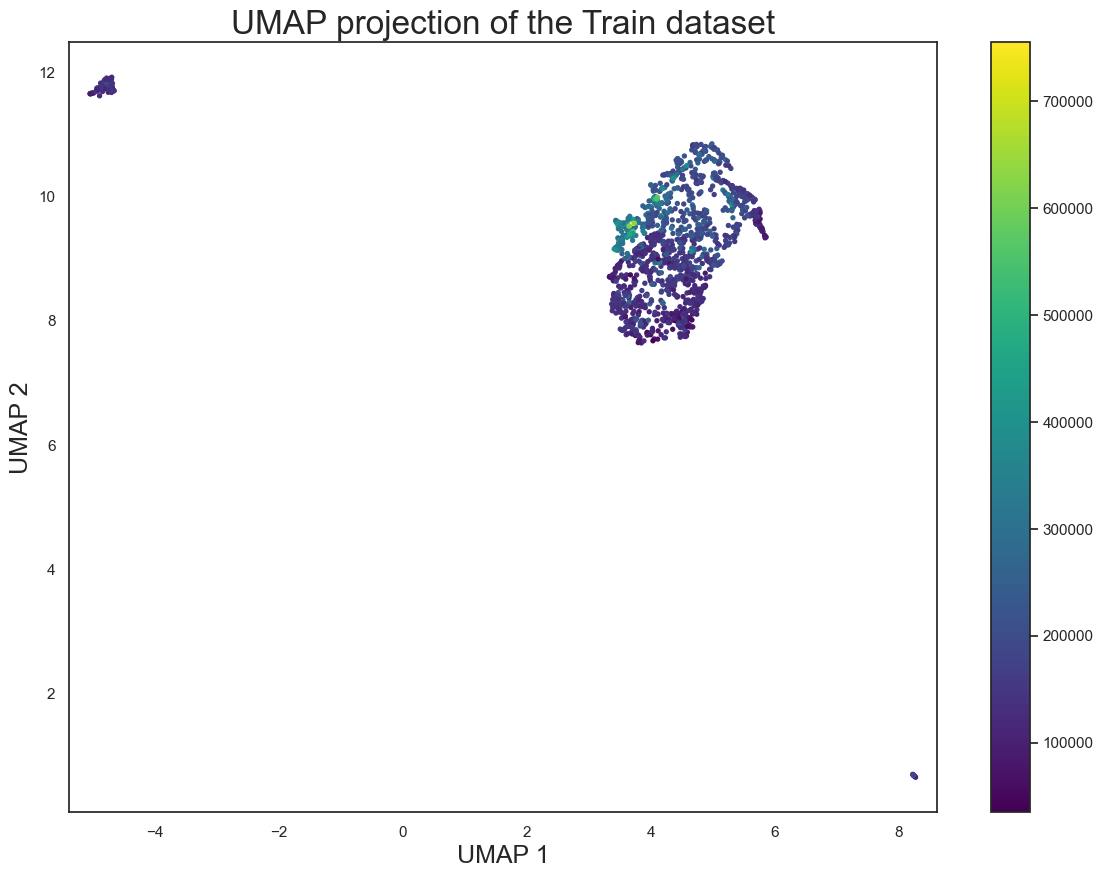

In [6]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=train_df['SalePrice'],
    cmap='viridis', s =8)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar()
plt.xlabel('UMAP 1', fontsize=18)
plt.ylabel('UMAP 2', fontsize=18)
plt.title('UMAP projection of the Train dataset', fontsize=24);

In [7]:
# Explore the furthest cluster whose x values is less than 3
# Add UMAP coordinates to the dataframe
train_df["UMAP1"] = embedding[:, 0]
train_df["UMAP2"] = embedding[:, 1]

print(train_df[train_df["UMAP1"] < 0].shape)

outliers = train_df[(train_df["UMAP1"] < 0)]
# outliers = outliers.append(train_df[train_df["UMAP2"] < 3])

train_df.drop(train_df[train_df["UMAP1"] < 0].index, inplace=True)

(61, 69)


In [8]:

train_df.drop(columns=["Id", "UMAP1", "UMAP2"], inplace=True)
print(f"Our dataset now has {train_df.shape[0]} rows")

Our dataset now has 1357 rows


In [9]:
print(f"Our dataset has {train_df.shape[0]} rows and {train_df.shape[1]} columns")

Our dataset has 1357 rows and 66 columns


In [10]:
train_df.to_csv("../Data/Data/train_filter_hyb.csv", index=False)